In [6]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(
    '/Users/tylerviducic/dev/hockey_analytics/gamescore_model')))

import glob
from utils import helper_funcs
import seaborn as sns
from sklearn import metrics, preprocessing
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
file_path = '/Users/tylerviducic/dev/hockey_analytics/gamescore_model/data/cleaned_data/whole_season/'
files = glob.glob(file_path + '*.csv')
df = pd.concat([pd.read_csv(f) for f in files], ignore_index = True)
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [8]:
df['game_goal_differential'] = np.where(df['home_or_away'] == 'HOME', df['home_score'] - df['away_score'], df['away_score'] - df['home_score'])

In [9]:
df.describe()

,playerId,season,gameId,gameDate,icetime,shifts,gameScore,iceTimeRank,I_F_xOnGoal,I_F_xGoals,...,OnIce_A_scoreAdjustedUnblockedShotAttempts,OnIce_A_xGoalsFromxReboundsOfShots,OnIce_A_xGoalsFromActualReboundsOfShots,OnIce_A_reboundxGoals,OnIce_A_xGoals_with_earned_rebounds,OnIce_A_xGoals_with_earned_rebounds_scoreAdjusted,OnIce_A_xGoals_with_earned_rebounds_scoreFlurryAdjusted,home_score,away_score,game_goal_differential
count,6.357100e+05,635710.000000,6.357100e+05,6.357100e+05,635710.000000,635710.000000,635710.000000,635710.000000,635710.000000,635710.000000,...,635710.000000,635710.000000,635710.000000,635710.000000,635710.000000,635710.00000,635710.000000,635710.000000,635710.000000,635710.000000
mean,8.473328e+06,2015.023764,2.015044e+09,2.015662e+07,990.174611,21.391614,0.450611,5.481737,1.680391,0.155841,...,9.092224,0.087494,0.093441,0.095902,0.511449,0.51314,0.505599,2.885135,2.619638,-0.265497
std,4.826895e+03,4.358557,4.358561e+06,4.398859e+04,292.598970,5.437033,0.734466,3.282639,1.393324,0.211990,...,4.232453,0.045160,0.176746,0.178932,0.289507,0.29158,0.285368,1.678371,1.583953,2.319635
min,8.445550e+06,2008.000000,2.008020e+09,2.008100e+07,1.000000,1.000000,-2.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-10.000000
25%,8.470612e+06,2011.000000,2.011021e+09,2.012012e+07,798.000000,18.000000,-0.060000,3.000000,0.692000,0.018000,...,6.042000,0.055000,0.000000,0.000000,0.298000,0.29800,0.295000,2.000000,1.000000,-2.000000
50%,8.474162e+06,2015.000000,2.015021e+09,2.016013e+07,998.000000,22.000000,0.300000,5.000000,1.434000,0.077000,...,8.698000,0.082000,0.000000,0.000000,0.472000,0.47300,0.467000,3.000000,2.000000,0.000000
75%,8.476854e+06,2019.000000,2.019020e+09,2.019102e+07,1189.000000,25.000000,0.850000,8.000000,2.390000,0.208000,...,11.684000,0.114000,0.141000,0.150000,0.680000,0.68200,0.672000,4.000000,4.000000,1.000000
max,8.484287e+06,2022.000000,2.022021e+09,2.023041e+07,2334.000000,46.000000,7.110000,13.000000,14.722000,3.598000,...,41.879000,0.446000,2.410000,2.410000,2.646000,2.74600,2.642000,10.000000,10.000000,8.000000


In [10]:
features = ['iceTimeRank', 'I_F_primaryAssists', 'I_F_secondaryAssists', 'I_F_goals', 'I_F_hits', 'I_F_takeaways', 
            'I_F_dZoneGiveaways', 'shotsBlockedByPlayer','faceoffsWon', 'faceoffsLost', 'penalties', 
            'penaltiesDrawn', 'OnIce_F_xGoals', 'OnIce_F_goals', 'OnIce_A_xGoals', 'OnIce_A_goals']
target = ['game_goal_differential']
model_columns = features + target


In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x_min_max = preprocessing.MinMaxScaler()
y_min_max = preprocessing.MinMaxScaler((-1, 1))

x_train, x_test, y_train, y_test = train_test_split(
    df[features], df[target], test_size=0.2)
norm_x_train = x_min_max.fit_transform(x_train)
norm_x_test = x_min_max.transform(x_test)
norm_y_train = y_min_max.fit_transform(y_train)
norm_y_test = y_min_max.transform(y_test)

In [45]:
from sklearn import linear_model

model = linear_model.Ridge(alpha=0.5)

In [46]:
model.fit(norm_x_train, norm_y_train)

Ridge(alpha=0.1)

In [47]:
print(f'coeficcients: ')
for feature, coef in zip(features, model.coef_[0]):
    print(f'{feature}: {coef}')

coeficcients: 
iceTimeRank: -0.007191896799296536
I_F_primaryAssists: -0.012809906933693164
I_F_secondaryAssists: -0.019600146030040958
I_F_goals: -0.018005610717965866
I_F_hits: -0.003100105319101041
I_F_takeaways: -0.011225391554868212
I_F_dZoneGiveaways: 0.013711714348909937
shotsBlockedByPlayer: 0.004643800044554023
faceoffsWon: -0.0008155450944747329
faceoffsLost: -3.2574791715080766e-05
penalties: -0.034350370502944774
penaltiesDrawn: -0.023749869713788622
OnIce_F_xGoals: -0.006410205757649505
OnIce_F_goals: -0.025663936131945127
OnIce_A_xGoals: -0.013199827188712347
OnIce_A_goals: -0.03845966554450021


In [48]:
pred_y = model.predict(x_test)

/Users/tylerviducic/miniforge3/envs/hockey/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(y_test, pred_y)}')
print(f'R2: {r2_score(y_test, pred_y)}')

MSE: 5.414109950251964
R2: -0.010801221753570678


In [50]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedKFold

cv_model = cross_validate(
    model, 
    norm_x_train,
    norm_y_train,
    cv=RepeatedKFold(n_splits=5, n_repeats=5),
    return_estimator=True
)

coefs = pd.DataFrame(
    [model_v.coef_[0] for model_v in cv_model['estimator']], columns=features
)

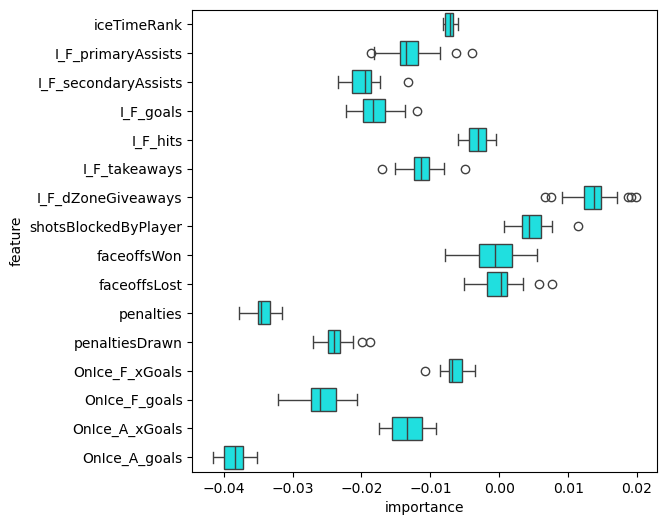

In [51]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.boxplot(data=coefs, orient="h", ax=ax, color='cyan')
ax.set_xlabel('importance')
ax.set_ylabel('feature')
plt.show()